# Machine learning
## Chapter 6, 1D Binary Classification
## Jun Sup Shin, Digital Imaging, GSAIM, CAU

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1 Dimensional binary classification
* input : 1 dimensional $x_n$
* output : binary classification, label $t_n \in \{0, 1\}$

### Matrix representation

$$
\mathbf{X} = \begin{bmatrix}
x_0 \\ x_1 \\ ... \\ x_{N-1}
\end{bmatrix}

\mathbf{T} = \begin{bmatrix}
t_0 \\ t_1 \\ ... \\ t_{N-1}
\end{bmatrix}
$$

In [2]:
#np.random.seed(seed=0)

num = 30 # 데이터 갯수
p = 0.5 # 라벨이 0인 비율

T = np.where(np.random.rand(num, 1) > p, 0, 1) # 목표 라벨
W = np.where(T == 0, 0.8, 1.6) # 분포의 폭
S = np.where(T == 0, 0.4, 0.8) # 분포의 시작 지점
X = np.multiply(np.random.rand(num, 1), W) + S # X 데이터 생성

### `np.where`
* one to one mapping function to describe binary solutions
* input : condition, true value, false value
* output : size of condition variable

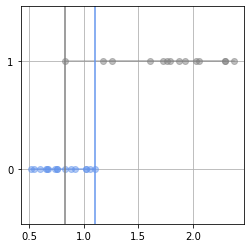

label = 0 max : 1.10
label = 1 min : 0.83


In [3]:
t0_max = np.max(X[T==0]) # label 0인 값들 중 최대
t1_min = np.min(X[T==1]) # label 1인 값들 중 최소

plt.figure(figsize=(4, 4))
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1])
plt.plot(X[T==0], T[T==0], 'cornflowerblue', alpha=0.5, marker='o')
plt.plot(X[T==1], T[T==1], 'gray', alpha=0.5, marker='o')
plt.axvline(t0_max, color='cornflowerblue')
plt.axvline(t1_min, color='gray')
plt.show()

print(f'label = 0 max : {t0_max:.2f}')
print(f'label = 1 min : {t1_min:.2f}')

### Solution
* $X[n] < 0.91$ must be label 0
* $X[n] > 1.17$ must be label 1
* Ambiguous region : what about $0.91 < X[n] < 1.17$ ?

## Bayesian Rule
$$p(w|D) = \frac{p(D|w)p(w)}{p(D)}$$
where $w$ : parameter of model, $D$ : data
* $p(w)$ : prior(사전확률, assumption before estimating the distribution)
* $p(D|w)$ : likelihood(가능도(우도), likelihood of $D$ when parameter $w$ is set)
* $p(D)$ : evidence(simply just normalization constant)

$$p(w|D) \propto p(D|w)p(w)$$

## Maximum Likelihood Estimation (ML or MLE)
* maximizing the likelihood $P(D|w)$

$\hspace{2.0cm} \rightarrow$ update the parameter $w$ to get maximum likelihood

### Log-likelihood
* $\log{P(D|w)}$
* using monotonic increasing properties of $\log$
* position of critical value does not change

## Recap : Logistic regression
* real data (roughly) follows gaussian distribution
* then conditional probability follows logistic model
$$y = w_0x + w_1$$
$$y = \sigma(w_0x + w_1)$$

as we are solving binary classification problem, the **decision plane** is the point at $y=0.5$

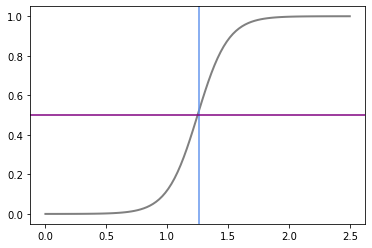

In [4]:
def logistic(x, w):
    return 1.0 / (1.0 + np.exp(-(x * w[0] + w[1])))

w = np.array([[8], [-10]])

_x = np.array([np.linspace(0, 2.5, 100)]).T
_y = logistic(_x, w)
plt.plot(_x, _y, color='gray', linewidth=2)

i = np.min(np.where(_y>0.5))
d_plane = _x[np.where(_y > 0.5)[0][0]]
plt.axvline(d_plane, color='cornflowerblue')
plt.axhline(0.5, color='purple')
plt.show()


## Cross-Entropy Loss
* The likelihood of our problem
$$p(t|x) = y^t(1-y)^{1-t}$$
* assuming the data $X$ is i.i.d(independent and identically distributed)
$$p(\mathbf{T}|\mathbf{X}) = \prod_{n=0}^{N-1}{p(t_n | x_n)} = \prod_{n=0}^{N-1}{y_{n}^{t_n}(1-y_n)^{1-t_n}}$$
* applying log likelihood
$$E(\mathbf{w}) = -\frac{1}{N}\log{p(\mathbf{T}|\mathbf{X})}$$
$$=-\frac{1}{N}\sum_{n=0}^{N-1}\{ t_n\log{y_n}+(1-t_n)\log{(1-y_n)} \}$$

In [5]:
def cross_entropy(w, x, t):
    y = logistic(x, w)
    return -1.0 / x.shape[0] * np.sum(np.multiply(t, np.log(y)) + np.multiply(1-t, np.log(1-y)))

# test
w = np.array([[1],[1]])
aX = np.concatenate((X, np.ones(X.shape)), axis=1)
print(f"cross entropy of W=[1, 1]^T = {cross_entropy(w, aX, T):.4f}")

cross entropy of W=[1, 1]^T = 2.2651


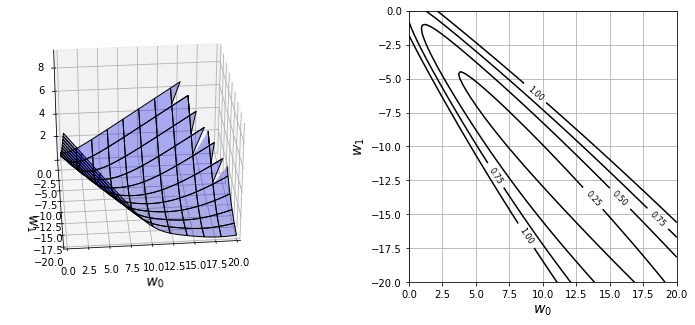

In [6]:
from mpl_toolkits.mplot3d import Axes3D

w_range = np.array([[0, 20], [-20, 0]])
grid_w0 = np.linspace(w_range[0, 0], w_range[0, 1], 100)
grid_w1 = np.linspace(w_range[1, 0], w_range[1, 1], 100)

ww0, ww1 = np.meshgrid(grid_w0, grid_w1)
z = np.zeros(ww0.shape)

for x_idx in range(ww1.shape[1]):
    for y_idx in range(ww0.shape[0]):
        z[y_idx, x_idx] = cross_entropy((ww0[y_idx, x_idx], ww1[y_idx, x_idx]), X, T)

# 3D surface plot
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, z, color='blue', edgecolor='black', rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(w_range[0, 0], w_range[0, 1])
ax.set_ylim(w_range[1, 0], w_range[1, 1])
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, z, 20, colors='black', levels=[0.25, 0.5, 0.75, 1.0])
cont.clabel(fmt='%1.2f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)

plt.show()

## Gradient Descent

### partial derivative of $\mathbf{w}$
$$E_n(\mathbf{w}) = -t_n\log{y_n} - (1-t)\log{(1-y_n)}$$
$$y_n = \sigma{(a_n)}=\frac{1}{1+\exp{(-a_n)}}$$
$$a_n = w_0x_n+w_1$$

### Chain-rule
$$\frac{\partial E_n}{\partial w_0} = \frac{\partial E_n}{\partial y_n} \frac{\partial y_n}{\partial a_n} \frac{\partial a_n}{\partial w_0}$$
$$\frac{\partial E_n}{\partial w_1} = \frac{\partial E_n}{\partial y_n} \frac{\partial y_n}{\partial a_n} \frac{\partial a_n}{\partial w_1}$$

* $\frac{\partial E_n}{\partial y_n}= -\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n}$
* $\frac{\partial y_n}{\partial a_n} = y_n(1-y_n)$
* $\frac{\partial a_n}{\partial w_0}=x_n$
* $\frac{\partial a_n}{\partial w_1}=1$



In [7]:
def dev_cross_entropy(w, x, t):
    y = logistic(x, w)
    
    par_a_w0 = x
    par_a_w1 = 1
    
    par_y_a = np.multiply(y, 1-y)
    
    par_e_y = - np.divide(t, y) + np.divide(1-t, 1-y)

    dev_w0 = np.sum(par_e_y * par_y_a * par_a_w0) / x.shape[0]
    dev_w1 = np.sum(par_e_y * par_y_a * par_a_w1) / x.shape[0]

    return [dev_w0, dev_w1]

print(dev_cross_entropy([1, -1], X, T))

[-0.05185782327042023, 0.09066520180662253]


### `scipy.minimize` : optimization via gradient descent

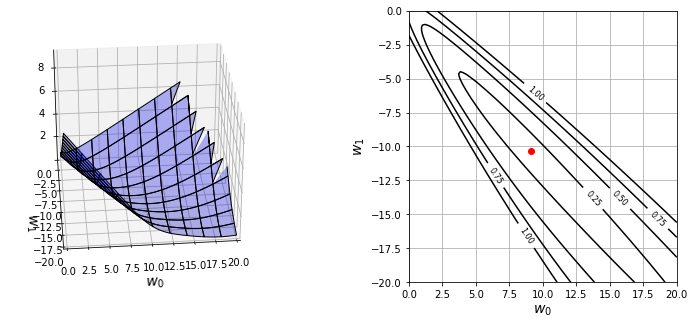

In [8]:
from scipy.optimize import minimize
opt_w = minimize(cross_entropy, [1, -1], args=(X, T), jac=dev_cross_entropy, method="CG").x

# 3D surface plot
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, z, color='blue', edgecolor='black', rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(w_range[0, 0], w_range[0, 1])
ax.set_ylim(w_range[1, 0], w_range[1, 1])

ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, z, 20, colors='black', levels=[0.25, 0.5, 0.75, 1.0])
cont.clabel(fmt='%1.2f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.plot(opt_w[0], opt_w[1], color='red', alpha=1.0, marker='o')

plt.grid(True)
plt.show()

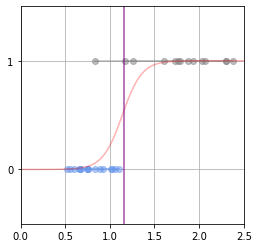

In [21]:
x = np.linspace(0, 2.5, 100)
opt_logistic = logistic(x, opt_w)

opt_dec_plane = np.where(opt_logistic > 0.5)[0][0]

plt.figure(figsize=(4, 4))
plt.grid(True)
plt.xlim(0, 2.5)
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1])
plt.plot(X[T==0], T[T==0], 'cornflowerblue', alpha=0.5, marker='o')
plt.plot(X[T==1], T[T==1], 'gray', alpha=0.5, marker='o')
plt.plot(x, opt_logistic, 'red', alpha=0.3)
plt.axvline(x[opt_dec_plane], color='purple', alpha = 0.7)

plt.show()